<a href="https://colab.research.google.com/github/youngscientist2k3/niftybees/blob/main/Copy_of_Section_7_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os


In [2]:
nifty_url='https://raw.githubusercontent.com/youngscientist2k3/niftybees/main/NIFTY.csv'
nifty_base1='https://raw.githubusercontent.com/youngscientist2k3/niftybees/main/NIFTY_BASE1.csv'

df1 = pd.read_csv(nifty_base1, usecols=['NAV_Date','DAY_DELTA','NAV_Value'])

In [3]:
df1.head()

,NAV_Date,DAY_DELTA,NAV_Value
0,2015-03-02,1.0,56.0614
1,2015-03-03,2.0,56.3536
2,2015-03-04,3.0,55.8955
3,2015-03-05,4.0,55.9900
4,2015-03-09,8.0,54.8667


In [4]:
#df1['NAV_Date'] = pd.to_datetime(df1['NAV_Date'].astype(str), format='%d/%m/%Y')
#df1.head()

In [5]:
#df1.dtypes



In [6]:
#df1['DAY_DELTA'] = (df1.NAV_Date - df1.NAV_Date.min()).dt.days


In [7]:
df1.head()
df2=df1.copy()
df2.head()

,NAV_Date,DAY_DELTA,NAV_Value
0,2015-03-02,1.0,56.0614
1,2015-03-03,2.0,56.3536
2,2015-03-04,3.0,55.8955
3,2015-03-05,4.0,55.9900
4,2015-03-09,8.0,54.8667


In [8]:
#df2.NAV_Date.min()

In [9]:
#df2["NAV_Value"] = pd.to_numeric(df2["NAV_Value"])

In [10]:
df2.dtypes

NAV_Date      object
DAY_DELTA    float64
NAV_Value    float64
dtype: object

In [19]:
df2.describe(include='all')

,NAV_Date,DAY_DELTA,NAV_Value
count,1436,1436.000000,1436.000000
unique,1436,NaN,NaN
top,2019-07-05,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1075.832869,65.316885
std,NaN,631.723925,12.192942
min,NaN,1.000000,44.061300
25%,NaN,533.000000,53.952600
50%,NaN,1063.000000,66.553800
75%,NaN,1597.250000,73.789050


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


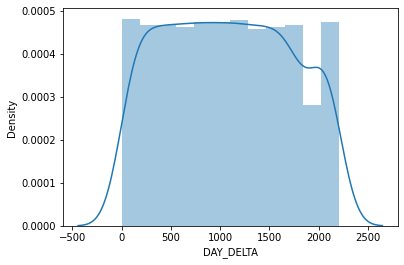

In [12]:
sns.distplot(df2['DAY_DELTA'])

In [13]:
x=df2['DAY_DELTA']
y=df2['NAV_Value']
df2.head()

,NAV_Date,DAY_DELTA,NAV_Value
0,2015-03-02,1.0,56.0614
1,2015-03-03,2.0,56.3536
2,2015-03-04,3.0,55.8955
3,2015-03-05,4.0,55.9900
4,2015-03-09,8.0,54.8667


In [14]:
x=x.values.reshape(-1,1)


In [15]:
y=y.values.reshape(-1,1)

In [16]:
reg=LinearRegression()

In [18]:
reg.fit(x,y)

ValueError: ignored

In [ ]:
reg.score(x,y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
new_data=df2['DAY_DELTA']
new_data.head()

In [ ]:
new_data1=pd.DataFrame(new_data)

In [ ]:
df2['Predicted_values']=reg.predict(new_data1)

In [ ]:
df2

In [93]:
from google.colab import files

df2.to_csv('NIFTY_PREDBASE.csv')
files.download('NIFTY_PREDBASE.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

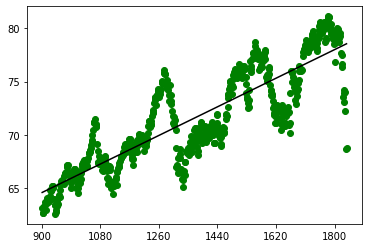

In [129]:
plt.yticks(np.arange(40,100, 5))
plt.xticks(np.arange(0,3000, 180))

plt.scatter(x, y,color='g')
plt.plot(x, reg.predict(x),color='k')

plt.show()

In [94]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY_FUTURE_BASE.csv to NIFTY_FUTURE_BASE.csv


In [97]:
import io
df3 = pd.read_csv(io.BytesIO(uploaded['NIFTY_FUTURE_BASE.csv']),usecols=['NAV_Date','DAY_DELTA'])

In [98]:
df3.head()

,NAV_Date,DAY_DELTA
0,18/03/21,2208
1,19/03/21,2209
2,20/03/21,2210
3,21/03/21,2211
4,22/03/21,2212


In [99]:
#df3['NAV_Date_toTimeStamp'] = pd.to_datetime(df3['NAV_Date'])
#df3.head()

In [100]:
#df3['DAY_DELTA'] = (df3.NAV_Date_toTimeStamp - df3.NAV_Date_toTimeStamp.min()).dt.days


In [101]:
new_data1=df3['DAY_DELTA']
new_data1.head()

0    2208
1    2209
2    2210
3    2211
4    2212
Name: DAY_DELTA, dtype: int64

In [102]:
new_data2=pd.DataFrame(new_data1)

In [103]:
df3['Predicted_values']=reg.predict(new_data2)
df3.head()

,NAV_Date,DAY_DELTA,Predicted_values
0,18/03/21,2208,85.967340
1,19/03/21,2209,85.985398
2,20/03/21,2210,86.003456
3,21/03/21,2211,86.021514
4,22/03/21,2212,86.039572


In [104]:
from google.colab import files

df3.to_csv('NIFTY_FUTURE_PRED.csv')
files.download('NIFTY_FUTURE_PRED.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>